# Operazione di convoluzione

Si definisce la convoluzione su un'immagine $L \in \mathbb{R}^{H \times W}$ contro una maschera $M \in \mathbb{R}^{n \times n}$, dove $n < H$, $n < W$ e $n = 2m + 1$:

$$
(L * M)_{ij} = \sum_{a = -m}^m \sum_{b = -m}^m L_{i - a, j - b} M_{ab}
$$

NB: $L * M \in \mathbb{R}^{(H-n+1) \times (W - n+1)}$


Ad esempio, per $n = 3$:
$$
\begin{align*}
(L * M)_{ij} & = & L_{i - 1, j - 1} \cdot M_{1, 1} & + & L_{i - 1, j} \cdot M_{1, 0} & + & L_{i - 1, j + 1} \cdot M_{1, -1} + \\
& + & L_{i , j - 1} \cdot M_{0, 1} & + & L_{i , j} \cdot M_{0, 0} & + & L_{i , j + 1} \cdot M_{0, -1} +\\
& + & L_{i + 1, j - 1} \cdot M_{-1, 1} & + & L_{i + 1, j} \cdot M_{-1, 0} & + & L_{i + 1, j + 1} \cdot M_{-1, -1} 
\end{align*}
$$


In [186]:
%cd ~/src/laboratori
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import convolve2d

/home/jovyan/src/laboratori


In [187]:
def luminanza(img):
    return 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]

In [188]:
def apply_mask(img, mask):
    height = img.shape[0] - mask.shape[0] + 1
    width = img.shape[1] - mask.shape[1] + 1
    result = np.zeros((height, width))

    # for i in range(height):
    #     for j in range(width):
    #         result[i, j] = np.sum(img[i:i + mask.shape[0], j:j + mask.shape[1]] * mask)

    result = convolve2d(img, mask, mode='valid') # versione ottimizzata

    return result

### Filtro di Sobel e filtro Laplaciano

Definire il filtro di Sobel e il filtro Laplaciano.

Caricare un'immagine e applicare i filtri di Sobel e Laplaciano su di essa.

In [189]:
img = mpimg.imread('img/3.jpg')

L = luminanza(img)

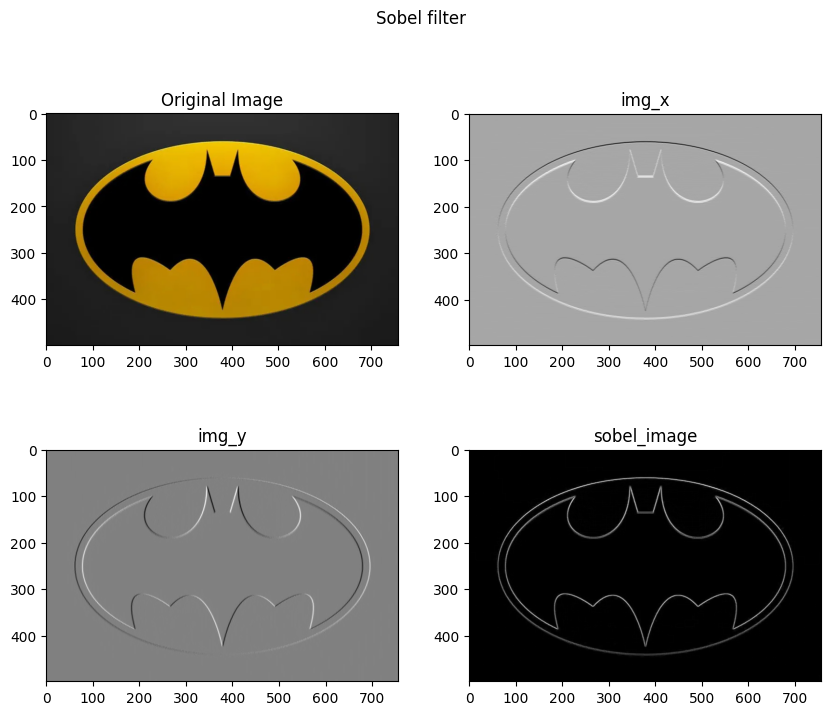

In [190]:
# SOBEL FILTER
mask_x = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]])
mask_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])

img_x = apply_mask(L, mask_x)
img_y = apply_mask(L, mask_y)

sobel_image = np.abs(img_x) + np.abs(img_y)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

fig.suptitle("Sobel filter")

axs[0, 0].imshow(img)
axs[0, 0].set_title("Original Image")

axs[0, 1].imshow(img_x, cmap='gray')
axs[0, 1].set_title("img_x")

axs[1, 0].imshow(img_y, cmap='gray')
axs[1, 0].set_title("img_y")

axs[1, 1].imshow(sobel_image, cmap='gray')
axs[1, 1].set_title("sobel_image")

plt.show()

In [191]:
# LAPLACE FILTER
mask = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]])
laplace_image = apply_mask(L, mask)

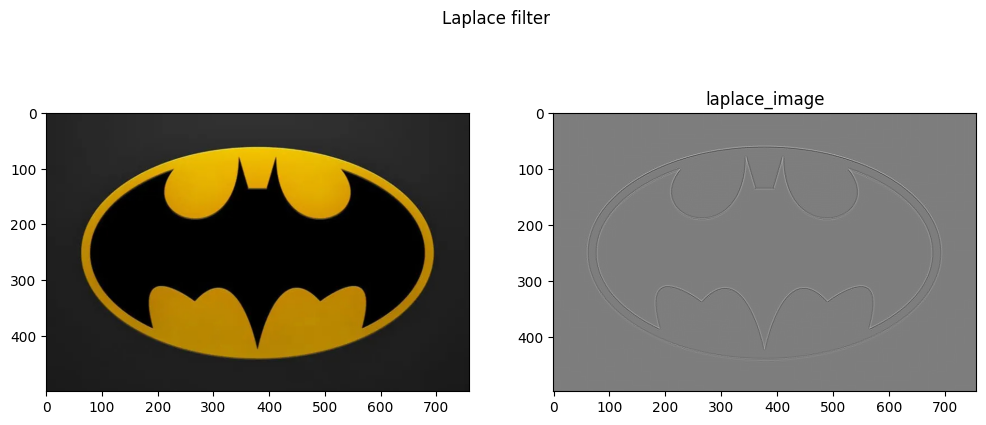

In [192]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("Laplace filter")

axs[0].imshow(img)
axs[1].set_title("Original Image")

axs[1].imshow(laplace_image, cmap='gray')
axs[1].set_title("laplace_image")

plt.show()

### Filtri di smoothing

Definire un filtro di media $5 \times 5$. Applicarlo poi alla immagine precedente.

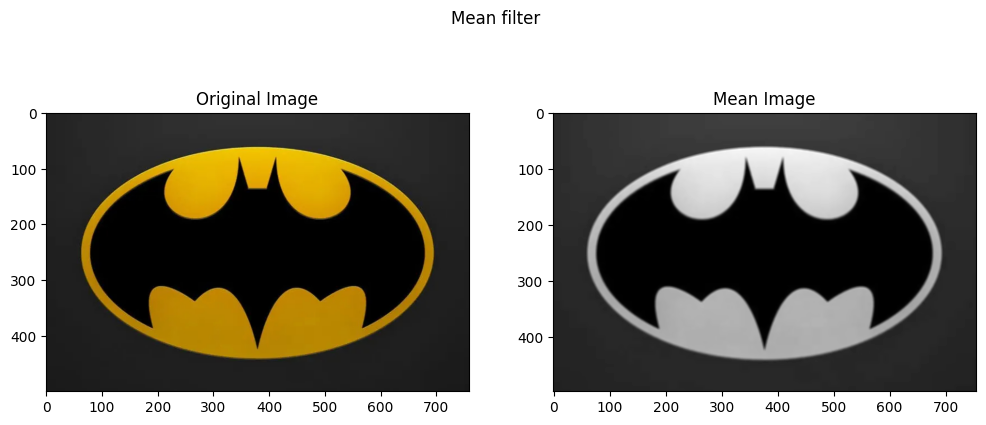

In [193]:
def mean_filter(img, mask_size):
    mask = np.ones((mask_size, mask_size)) / (mask_size * mask_size)
    return apply_mask(img, mask)

mean_img = mean_filter(L, 5)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Mean filter")
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(mean_img, cmap='gray')
axs[1].set_title("Mean Image")
plt.show()

Definire un filtro Gaussiano $5 \times 5$. Applicarlo poi alla immagine precedente.

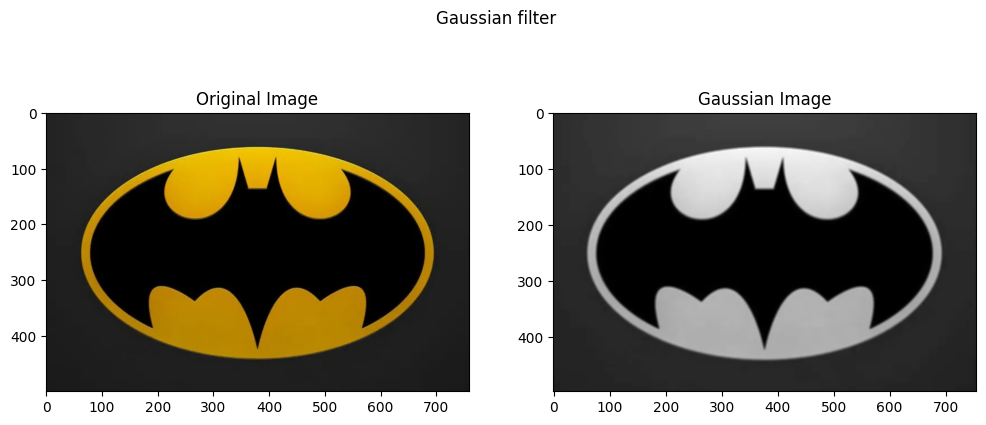

In [ ]:
def gaussian_filter(img, mask_size):
    mask = np.zeros((mask_size, mask_size))
    for i in range(mask_size):
        for j in range(mask_size):
            mask[i, j] = (1 / (2 * np.pi)) * np.exp(-(i ** 2 + j ** 2) / 2)

    return apply_mask(img, mask)

gaussian_img = mean_filter(L, 5)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Gaussian filter")
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(gaussian_img, cmap='gray')
axs[1].set_title("Gaussian Image")
plt.show()

Definire i filtri di minimo e massimo, e il filtro mediano. In che cosa si differenziano rispetto ai filtri precedenti?